# Zomato EDA

# Step 1: importing libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Creating Data frame

In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
dataframe = pd.read_csv("Zomato data .csv")

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
def handleRate(value): 
    value=str(value).split('/') 
    value=value[0];
    return float(value) 
dataframe['rate']=dataframe['rate'].apply(handleRate) 
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


# 1.Dining restaurents are prefered by large number of individuals

Text(0, 0.5, 'Votes')

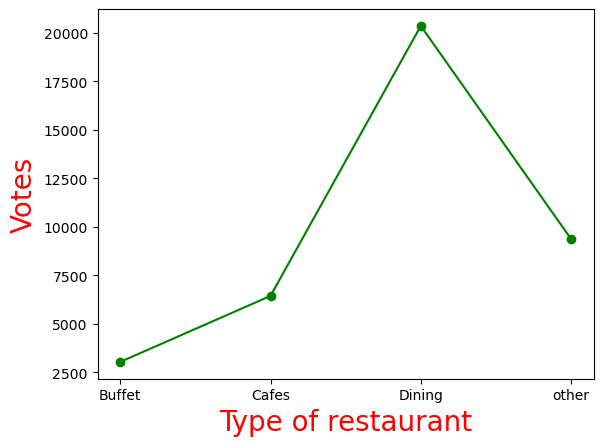

In [6]:
grouped_data = dataframe.groupby('listed_in(type)') ['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o") 
plt.xlabel("Type of restaurant", c="red", size=20) 
plt.ylabel("Votes", c="red", size=20)

# 2. Ratings recived by restaurents

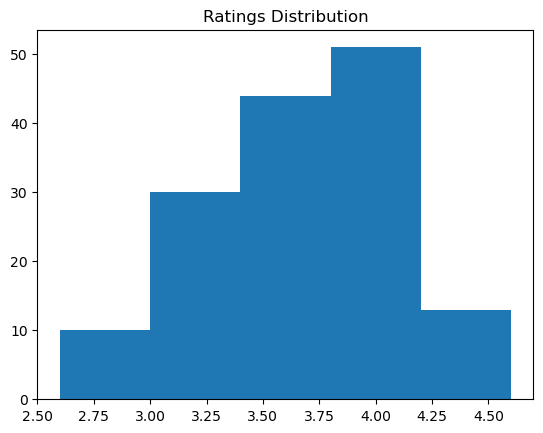

In [7]:
plt.hist(dataframe['rate'],bins=5) 
plt.title("Ratings Distribution")
plt.show()

# Majority of restaurents recived rating  between 3.5 and 4

# 3. Affordability

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

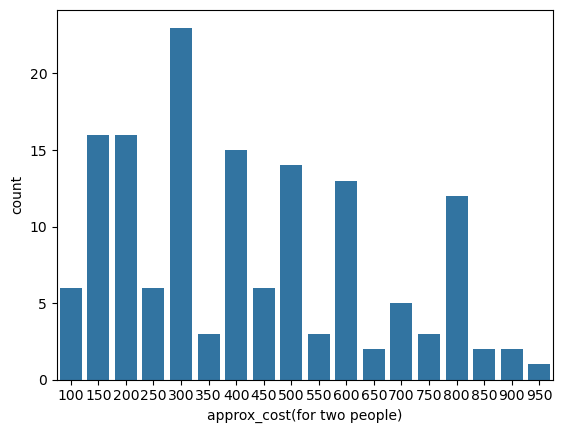

In [40]:
couple_data=dataframe['approx_cost(for two people)'] 
sns.countplot(x=couple_data)

# 4. Offline orders recive lower rating than online orders

<Axes: xlabel='online_order', ylabel='rate'>

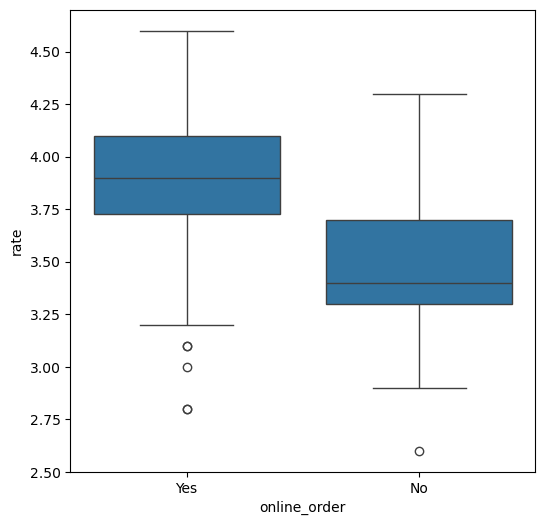

In [52]:
plt.figure(figsize = (6,6)) 
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

# 5. Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

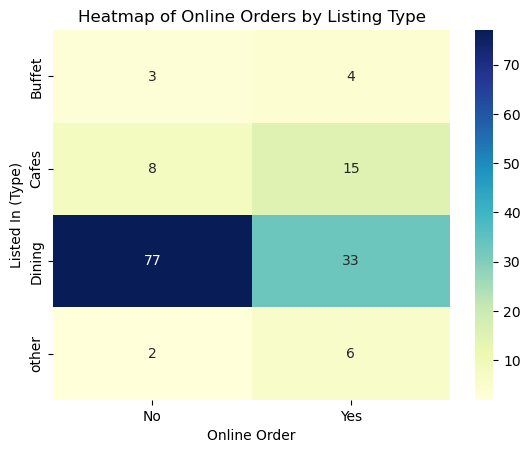

In [10]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

# Plot the heatmap
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

# Set titles and labels
plt.title("Heatmap of Online Orders by Listing Type")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")

# Show the plot
plt.show()